# Price Prediction
In this section, the price of the homes listed will be predicted using the features.
Models will be built and evaluated to pick the best model

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from rfpimp import *

In [470]:
df = pd.read_csv(r'D:\Jupyter notebook\Projects\Air Bnb\AirBnb\Data\listings_after_cleaning.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87055 entries, 0 to 87054
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         87055 non-null  int64  
 1   experiences_offered        87055 non-null  object 
 2   host_id                    87055 non-null  int64  
 3   host_response_time         87055 non-null  object 
 4   host_response_rate         87055 non-null  object 
 5   host_total_listings_count  87055 non-null  float64
 6   London_Borough             87055 non-null  object 
 7   property_type              87055 non-null  object 
 8   room_type                  87055 non-null  object 
 9   accommodates               87055 non-null  int64  
 10  bathrooms                  87055 non-null  float64
 11  bedrooms                   87055 non-null  float64
 12  beds                       87055 non-null  float64
 13  bed_type                   87055 non-null  obj

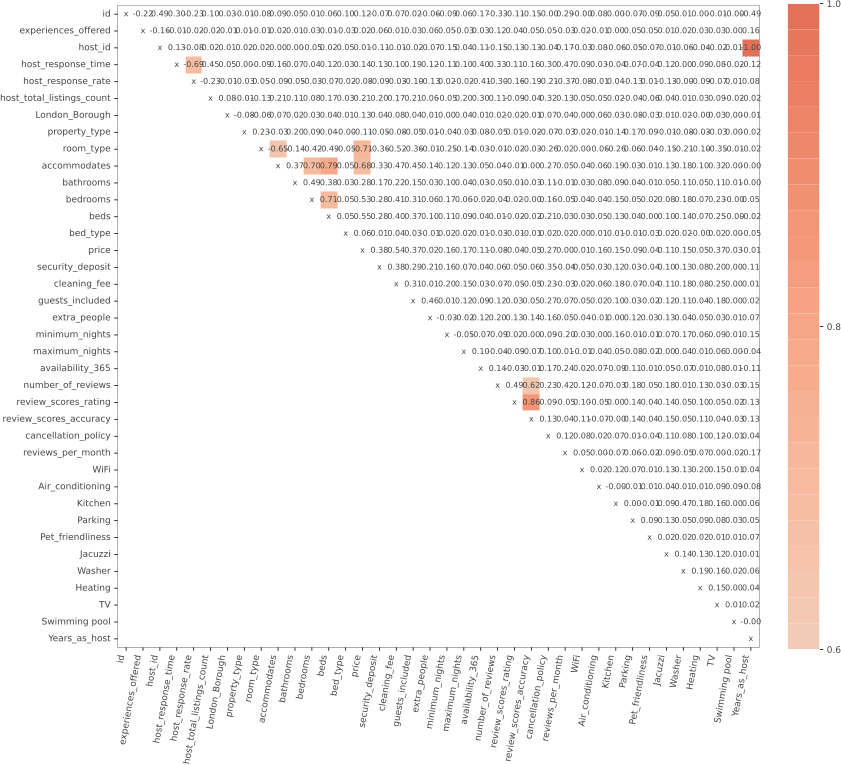

In [417]:
plot_corr_heatmap(df,figsize=(12,90))

In [418]:
object_cols = list(df.select_dtypes(include='object').columns)
dt = pd.get_dummies(columns=object_cols,data=df.drop(['id','host_id'],axis=1))
pd.set_option('display.max_columns', len(dt.columns))
stand_dt = pd.DataFrame(
            StandardScaler().fit_transform(dt),columns=dt.columns)

In [419]:
train_val_data = stand_dt.drop('price',axis=1)[:80000]
train_val_targets = stand_dt.price[:80000]
test_targets = stand_dt.price[80000:]
test_data = stand_dt.drop('price',axis=1)[80000:]
x_train,x_val,y_train,y_val = train_test_split(train_val_data,train_val_targets,shuffle=True,test_size=0.3)

## Model 1: Random Forest Regressor

In [425]:
Rfr = RandomForestRegressor(n_jobs=-1,n_estimators=5,oob_score=True,min_samples_leaf=30)
training = Rfr.fit(x_train,y_train)
val_predicted = Rfr.predict(x_val)
mae = mean_absolute_error(y_val,val_predicted)
rmse = mean_squared_error(val_predicted,y_val,squared=False)
oob_score = Rfr.oob_score_
r_sq = r2_score(y_val,val_predicted)
print('mae: ' , round(mae,2))
print('Rmse: ' , round(rmse,2))
print('oob_Score: ' ,round(oob_score,2))
print('R-squared: ' , round(r_sq,3))

mae:  0.21
Rmse:  0.78
oob_Score:  0.27
R-squared:  0.334


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklear

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklear

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklear

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklear

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


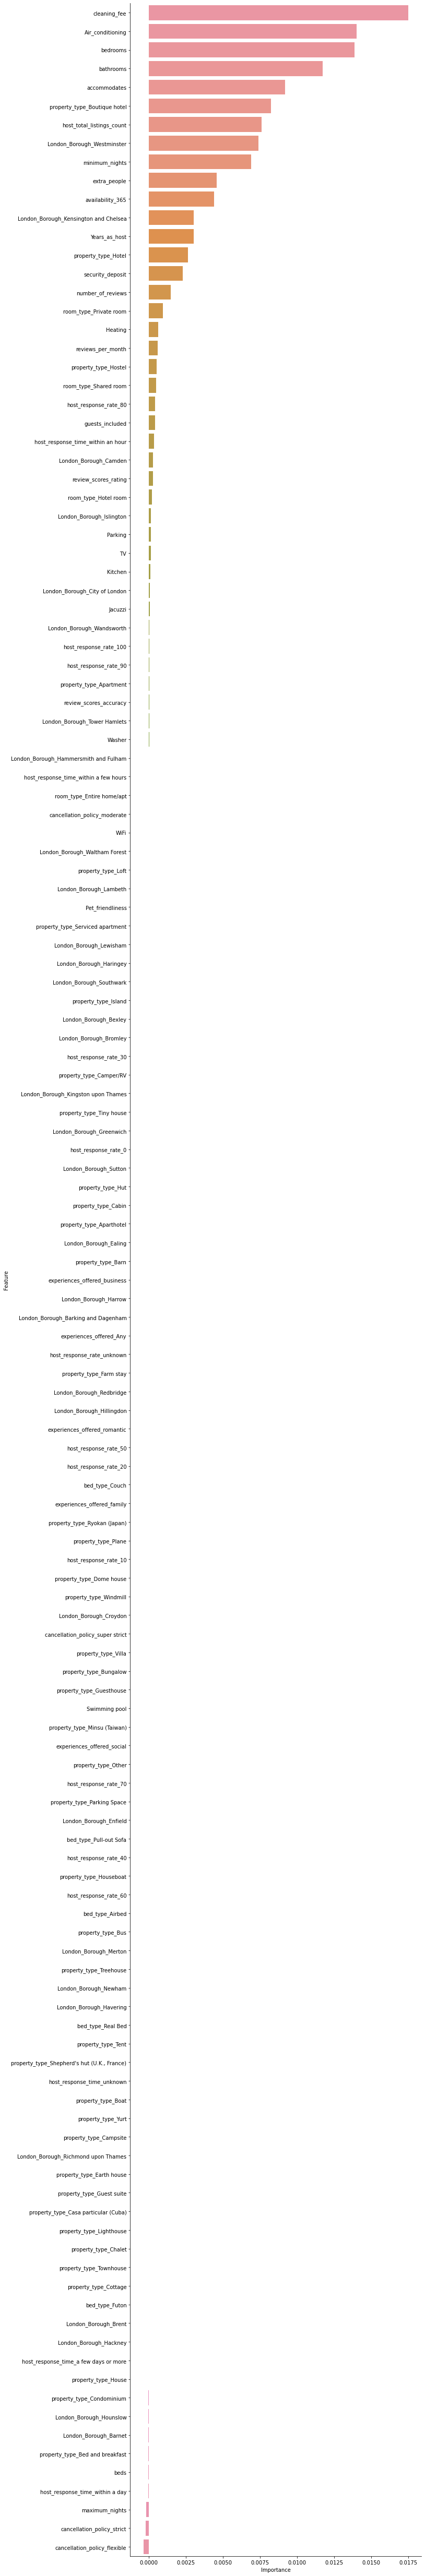

In [428]:
Feature_importances= dropcol_importances(Rfr, x_train, y_train)

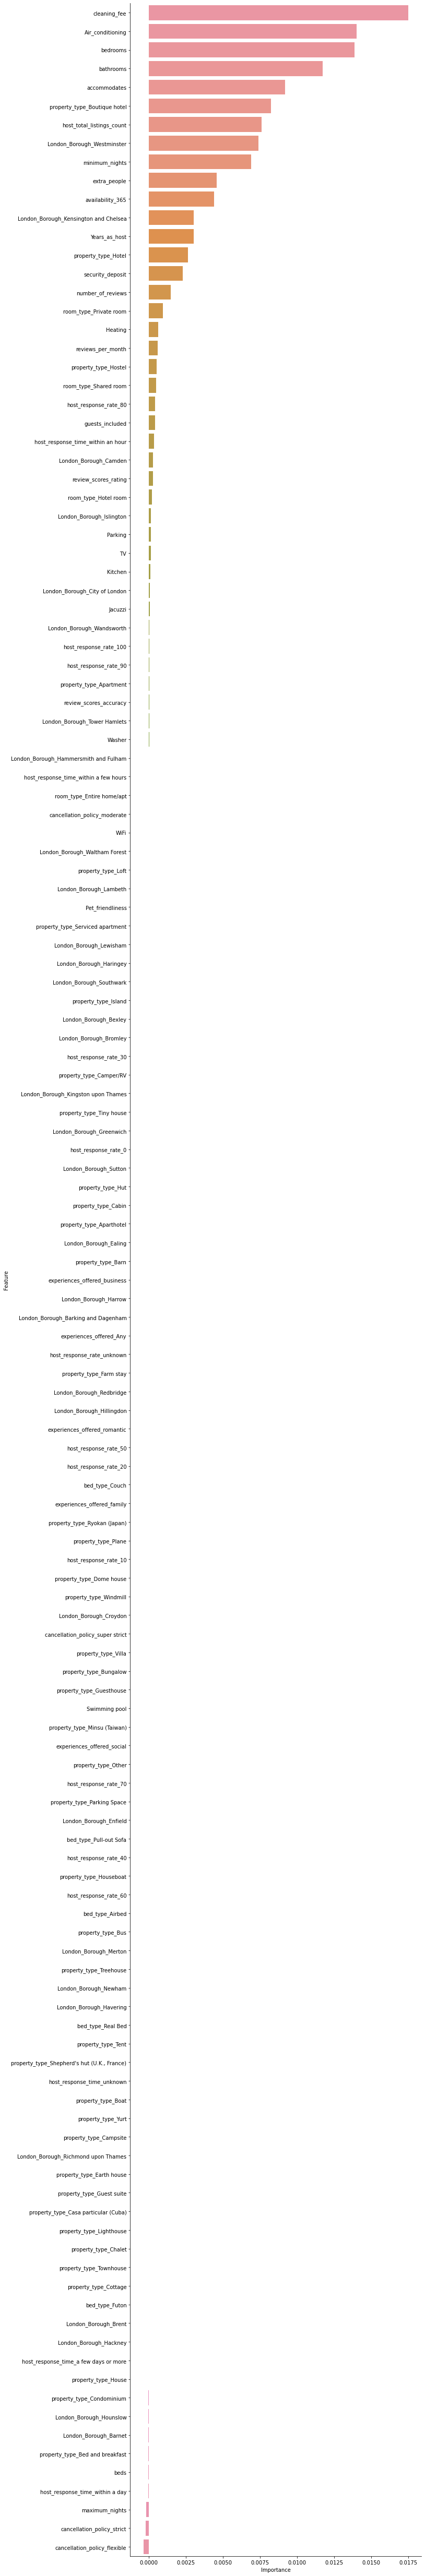

In [466]:
plt.figure(figsize=(10,90))
sns.barplot(
    data=Feature_importances.reset_index().sort_values('Importance',ascending=False)
    ,y='Feature',x='Importance')
sns.despine()

In [334]:
#Random forest evaluation
pred_eval_rfr = Rfr.predict(test_data)
mae = mean_absolute_error(test_targets,pred_eval_rfr)
rmse = mean_squared_error(test_targets,pred_eval_rfr,squared=False)
print(['Mae: ', round(mae,4)],
     ['RMSE: ', round(rmse,4)],
     sep='\n')

['Mae: ', 0.3246]
['RMSE: ', 0.8068]


## Model 2:  XGboost

In [480]:
import xgboost as xgb
from xgboost import plot_importance

In [472]:
train_val_data = stand_dt.drop('price',axis=1)[:80000]
train_val_targets = stand_dt.price[:80000]
test_targets = stand_dt.price[80000:]
test_data = stand_dt.drop('price',axis=1)[80000:]
x_train,x_val,y_train,y_val = train_test_split(train_val_data,train_val_targets,shuffle=True,test_size=0.3)

In [473]:
dmatrix_train =xgb.DMatrix(x_train,label=y_train)
dmatrix_val = xgb.DMatrix(x_val,label=y_val)

In [474]:
params = {'max_depth': 6, 'min_child_weight': 1,'eta':0.1,'subsample': 1,
                'colsample_bytree': 1,'objective':'reg:linear', 'eval_metric':'mae'}

xgb_model = xgb.train(params,dmatrix_train,num_boost_round=999,
                      evals=[(dmatrix_val,'Test')],early_stopping_rounds=10
)

[20:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.67363
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.62222
[2]	Test-mae:0.57657
[3]	Test-mae:0.53532
[4]	Test-mae:0.49818
[5]	Test-mae:0.46545
[6]	Test-mae:0.43668
[7]	Test-mae:0.41079
[8]	Test-mae:0.38808
[9]	Test-mae:0.36773
[10]	Test-mae:0.34977
[11]	Test-mae:0.33330
[12]	Test-mae:0.31855
[13]	Test-mae:0.30592
[14]	Test-mae:0.29447
[15]	Test-mae:0.28413
[16]	Test-mae:0.27525
[17]	Test-mae:0.26702
[18]	Test-mae:0.26021
[19]	Test-mae:0.25360
[20]	Test-mae:0.24815
[21]	Test-mae:0.24329
[22]	Test-mae:0.23893
[23]	Test-mae:0.23487
[24]	Test-mae:0.23136
[25]	Test-mae:0.22841
[26]	Test-mae:0.22560
[27]	Test-mae:0.22337
[28]	Test-mae:0.22114
[29]	Test-mae:0.21898
[30]	Test-mae:0.21739
[31]	Test-mae:0.21564
[32]	Test-mae:0.21426
[33]	Test-mae:0.21316
[34]	Test-mae:0.21195
[35]	Te

In [475]:
print('Best Mae:' ,xgb_model.best_score)

Best Mae: 0.189085


In [476]:
eval_dmatrix = xgb.DMatrix(test_data,label=test_targets)
pred_eval_xgb = xgb_model.predict(eval_dmatrix)
mae = mean_absolute_error(test_targets,pred_eval_xgb)
rmse = mean_squared_error(test_targets,pred_eval_xgb,squared=False)
print(['Mae: ', round(mae,4)],
     ['RMSE: ', round(rmse,4)],
     sep='\n')

['Mae: ', 0.3028]
['RMSE: ', 0.794]


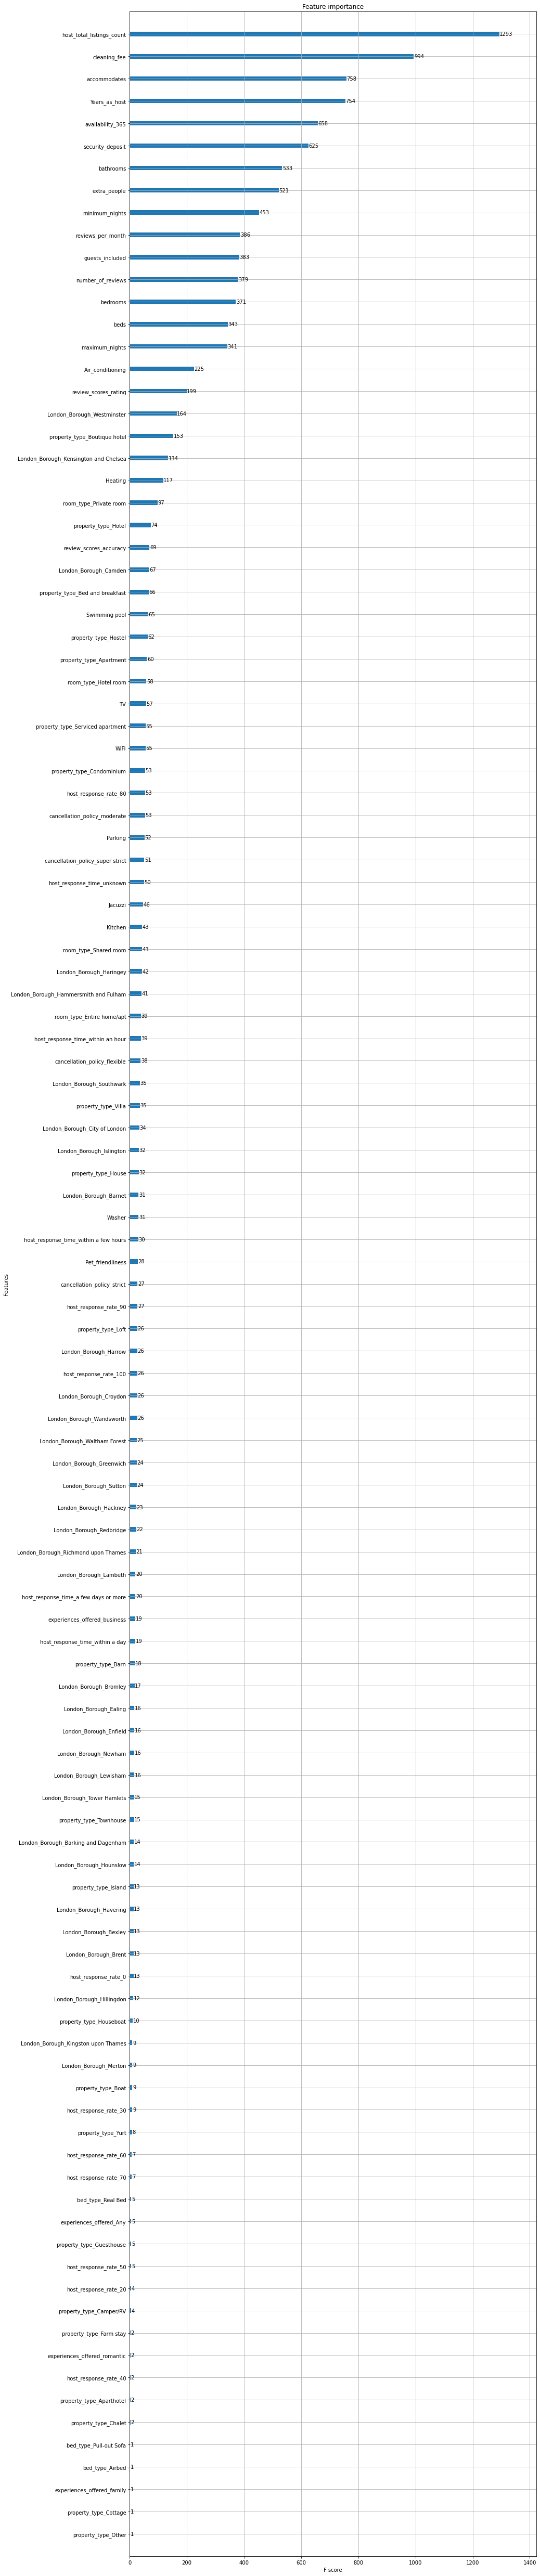

In [487]:
plt.rcParams["figure.figsize"] = (14, 90)
plot_importance(xgb_model)

## Model 3: 5-layered- neural network

In [429]:
from keras import models,layers,metrics

In [430]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],) ))
model.add(layers.Dense(128,activation ='relu'))
model.add(layers.Dense(256,activation ='relu'))
model.add(layers.Dense(256,activation ='relu'))
model.add(layers.Dense(128,activation ='relu'))
model.compile( 
               optimizer='rmsprop',loss='mse',metrics=['mae'] 
)
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 64)                8832      
_________________________________________________________________
dense_121 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_122 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_123 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_124 (Dense)            (None, 128)               32896     
Total params: 148,864
Trainable params: 148,864
Non-trainable params: 0
_________________________________________________________________


In [431]:
history = model.fit(
    x_train,y_train,epochs=200,batch_size=20,verbose=0,validation_data=(x_val,y_val)
)

In [432]:
nn = history.history
epochs = range(1,len(nn.get('loss'))+1)
training_loss = nn['loss']
val_loss = nn['val_loss']
training_mae = nn['mae']
val_mae  = nn['val_mae']

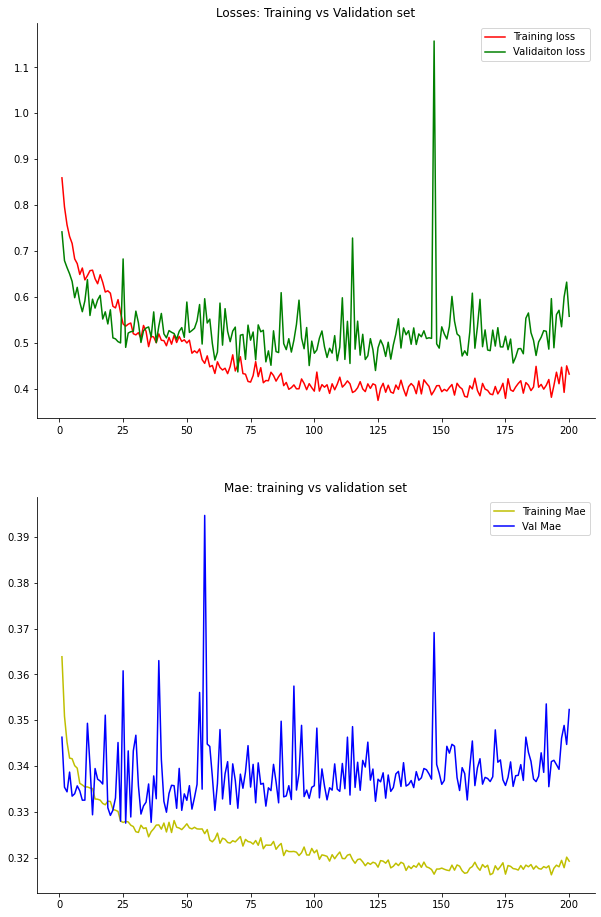

In [433]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,16))
ax1.set_title('Losses: Training vs Validation set')
ax1.plot(epochs,training_loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'g',label='Validaiton loss')
ax1.legend()

ax2.set_title('Mae: training vs validation set')
ax2.plot(epochs,training_mae,'y',label = 'Training Mae')
ax2.plot(epochs,val_mae,'b',label='Val Mae')
ax2.legend()
sns.despine()

In [434]:
(Test_loss, Test_mae) = model.evaluate(test_data,test_targets,verbose=0)
Test_mae

0.4578053057193756

## Model 4: 5-layer neural network with drop out regularization 

In [451]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],) ))
model.add(layers.Dense(128,activation ='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256,activation ='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256,activation ='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128,activation ='relu'))
model.add(layers.Dense(1))
model.compile( 
               optimizer='rmsprop',loss='mse',metrics=['mae'] 
)
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 64)                8832      
_________________________________________________________________
dense_144 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_145 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)             

In [452]:
history = model.fit(
    x_train,y_train,epochs=200,batch_size=20,verbose=0,validation_data=(x_val,y_val)
)

In [453]:
nn = history.history
epochs = range(1,len(nn.get('loss'))+1)
training_loss = nn['loss']
val_loss = nn['val_loss']
training_mae = nn['mae']
val_mae  = nn['val_mae']

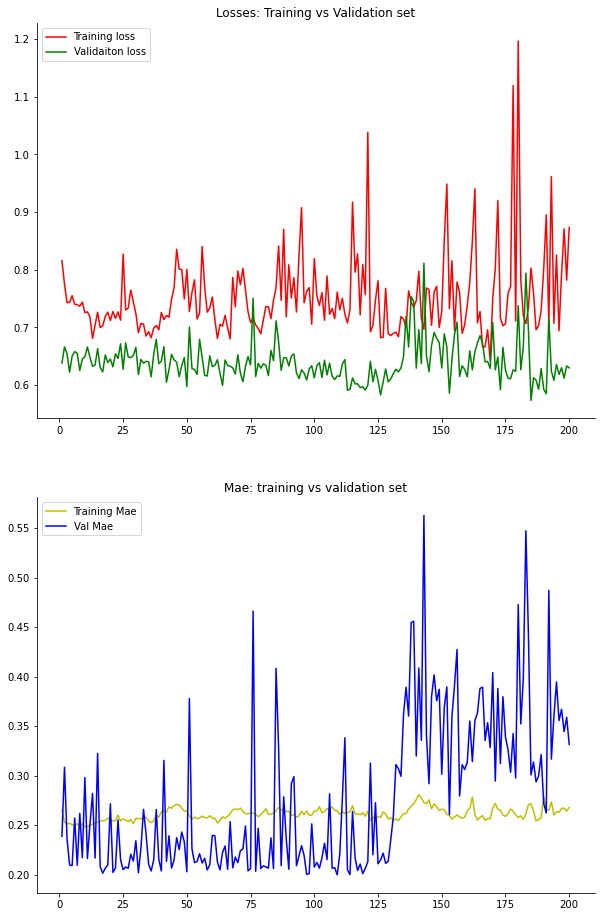

In [454]:

fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,16))
ax1.set_title('Losses: Training vs Validation set')
ax1.plot(epochs,training_loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'g',label='Validaiton loss')
ax1.legend()

ax2.set_title('Mae: training vs validation set')
ax2.plot(epochs,training_mae,'y',label = 'Training Mae')
ax2.plot(epochs,val_mae,'b',label='Val Mae')
ax2.legend()
sns.despine()

In [455]:
(Test_loss, Test_mae) = model.evaluate(test_data,test_targets,verbose=0)
Test_mae

0.4109719693660736

## Model 5: 5-layered neural network with weight regularization

In [456]:
from keras.regularizers import l1_l2

In [457]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],),kernel_regularizer=l1_l2(l1=0.001, l2=0.001) ))
model.add(layers.Dense(128,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.0031)))
model.add(layers.Dense(256,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(layers.Dense(256,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(layers.Dense(128,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(layers.Dense(1))
model.compile( 
               optimizer='rmsprop',loss='mse',metrics=['mae'] 
)
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 64)                8832      
_________________________________________________________________
dense_150 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_151 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_152 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_153 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 129       
Total params: 148,993
Trainable params: 148,993
Non-trainable params: 0
_______________________________________________

In [458]:
history = model.fit(
    x_train,y_train,epochs=200,batch_size=20,verbose=0,validation_data=(x_val,y_val)
)

In [459]:
nn = history.history
epochs = range(1,len(nn.get('loss'))+1)
training_loss = nn['loss']
val_loss = nn['val_loss']
training_mae = nn['mae']
val_mae  = nn['val_mae']

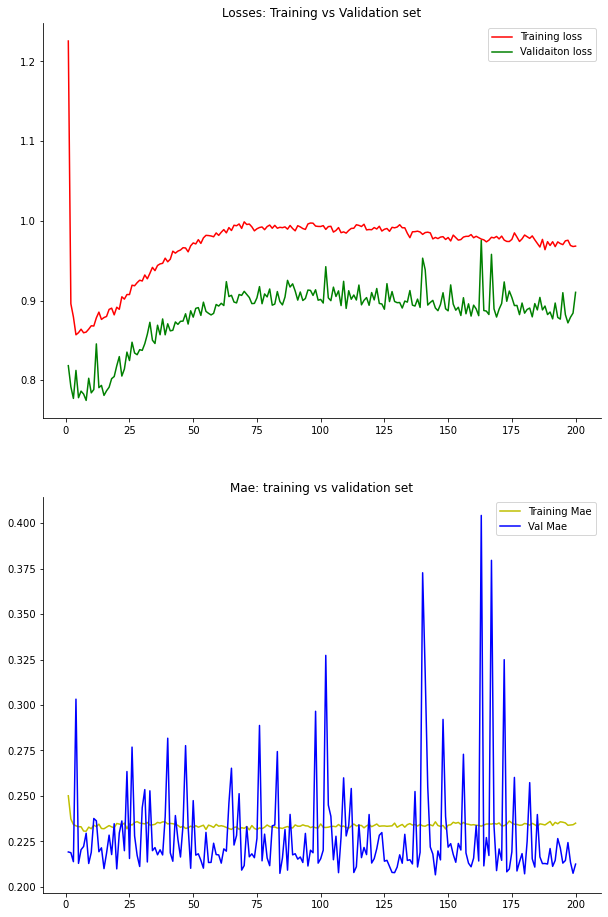

In [460]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,16))
ax1.set_title('Losses: Training vs Validation set')
ax1.plot(epochs,training_loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'g',label='Validaiton loss')
ax1.legend()

ax2.set_title('Mae: training vs validation set')
ax2.plot(epochs,training_mae,'y',label = 'Training Mae')
ax2.plot(epochs,val_mae,'b',label='Val Mae')
ax2.legend()
sns.despine()

In [461]:
(Test_loss, Test_mae) = model.evaluate(test_data,test_targets,verbose=0)
Test_mae

0.29408642649650574

## Model 6: 5-layered neural network with wieght regularization and Adam optimizer

In [462]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],),kernel_regularizer=l1_l2(l1=0.001, l2=0.001) ))
model.add(layers.Dense(128,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.0031)))
model.add(layers.Dense(256,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(layers.Dense(256,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(layers.Dense(128,activation ='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(layers.Dense(1))
model.compile( 
               optimizer='Adam',loss='mse',metrics=['mae'] 
)
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 64)                8832      
_________________________________________________________________
dense_156 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_157 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_158 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_159 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 129       
Total params: 148,993
Trainable params: 148,993
Non-trainable params: 0
_______________________________________________

In [463]:
history = model.fit(
    x_train,y_train,epochs=200,batch_size=20,verbose=0,validation_data=(x_val,y_val)
)

In [464]:
nn = history.history
epochs = range(1,len(nn.get('loss'))+1)
training_loss = nn['loss']
val_loss = nn['val_loss']
training_mae = nn['mae']
val_mae  = nn['val_mae']

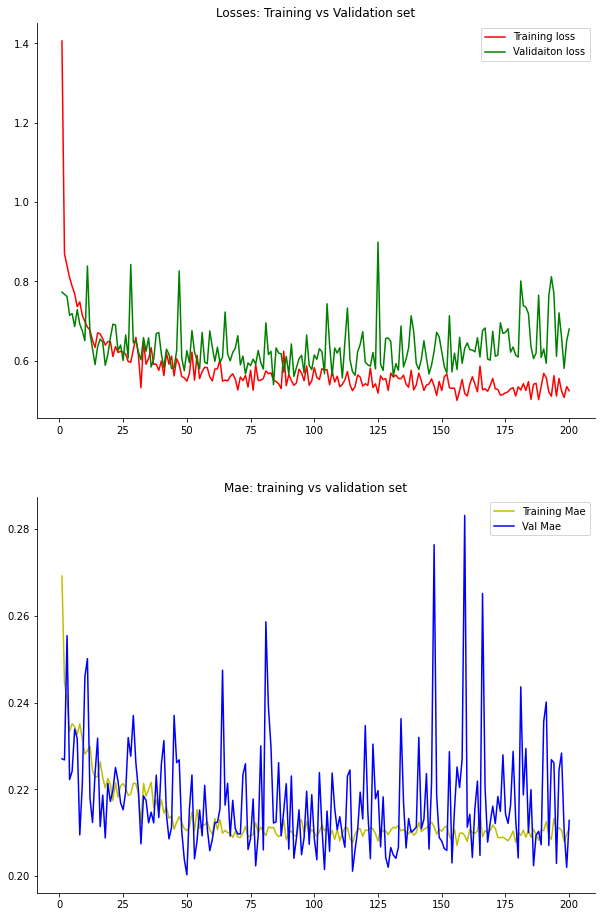

In [465]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,16))
ax1.set_title('Losses: Training vs Validation set')
ax1.plot(epochs,training_loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'g',label='Validaiton loss')
ax1.legend()

ax2.set_title('Mae: training vs validation set')
ax2.plot(epochs,training_mae,'y',label = 'Training Mae')
ax2.plot(epochs,val_mae,'b',label='Val Mae')
ax2.legend()
sns.despine()

In [468]:
(Test_loss, Test_mae) = model.evaluate(test_data,test_targets,verbose=0)
print('Mae: ' ,Test_mae)

Mae:  0.3263781666755676


#### **Final model selection:** 
5-layered neural network with weight regularization and rmsprop as an optimizer was chosen aas the best model due to having the lowest mean absolute error

# Conclusions
The price prediction accuracy could be improved by doing the following:
1. Incorporating the description column and using Natural Language processing in the price prediction process
2. Studying the profile pictures of hosts and their effect the price